# Probabilistic Modelling. 

In [1]:
# Code source: Sebastian Curi and Andreas Krause, based on Jaques Grobler (sklearn demos).
# License: BSD 3 clause

# We start importing some modules and running some magic commands
%matplotlib inline
%reload_ext autoreload
%load_ext autoreload
%autoreload 2

# General math and plotting modules.
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import itertools

# Widget and formatting modules
import ipywidgets
from ipywidgets import interact, interactive, interact_manual
import pylab
# If in your browser the figures are not nicely vizualized, change the following line. 
pylab.rcParams['figure.figsize'] = (20, 5)

# Machine Learning library. 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification, load_iris 
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import mixture

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = {"moons": make_moons(noise=0.3, random_state=0),
            "circles": make_circles(noise=0.2, factor=0.5, random_state=1),
            "linear": linearly_separable}

In [3]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    #"Linear SVM": SVC(kernel="linear", C=0.025),
    #"RBF SVM": SVC(gamma=2, C=1),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB()}


def evaluate_classifiers(dataset):
    # preprocess dataset, split into training and test part
    X, y = datasets[dataset]
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    i = 0
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(1, len(classifiers) + 1, i+1)

    ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    for name, clf in classifiers.items():
        ax = plt.subplot(1, len(classifiers) + 1, 1+i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1
        
interact(evaluate_classifiers, dataset=datasets.keys())

interactive(children=(Dropdown(description='dataset', options=('moons', 'circles', 'linear'), value='moons'), …

<function __main__.evaluate_classifiers(dataset)>

# Probability of classifiers

classif_rate for L2 logistic (Multinomial) : 82.000000 
classif_rate for Naive Bayes : 78.000000 


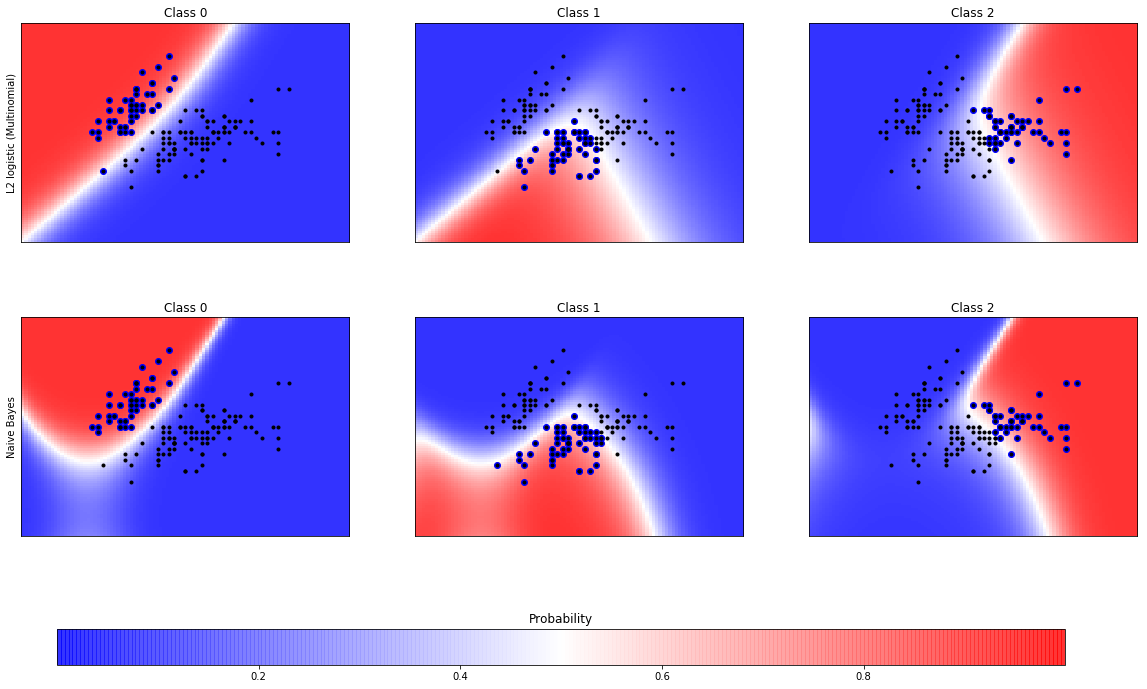

In [4]:
pylab.rcParams['figure.figsize'] = (20, 10)

iris = load_iris()
X = iris.data[:, 0:2]  # we only take the first two features for visualization
y = iris.target

n_features = X.shape[1]
C = 1
classifiers = {'L2 logistic (Multinomial)': LogisticRegression(C=C, solver='lbfgs', multi_class='multinomial'),
               'Naive Bayes': GaussianNB(),
               }

n_classifiers = len(classifiers)

# plt.figure(figsize=(3 * 2, n_classifiers * 2))
plt.subplots_adjust(bottom=.2, top=.95)

xx = np.linspace(3, 9, 100)
yy = np.linspace(1, 5, 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X, y)

    y_pred = classifier.predict(X)
    classif_rate = np.mean(y_pred.ravel() == y.ravel()) * 100
    print("classif_rate for %s : %f " % (name, classif_rate))

    # View probabilities=
    probas = classifier.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    
    for k in range(n_classes):
        plt.subplot(n_classifiers, n_classes, index * (n_classes) + k + 1)
        plt.title("Class %d" % k)
        if k == 0:
            plt.ylabel(name)
        imshow_handle = plt.imshow(probas[:, k].reshape((100, 100)), cmap=plt.cm.bwr, alpha=0.8,
                                   extent=(3, 9, 1, 5), origin='lower')
        plt.xticks(())
        plt.yticks(())
        idx = (y_pred == k)
        if idx.any():
            plt.scatter(X[idx, 0], X[idx, 1], marker='o', c='b')
        plt.scatter(X[:, 0], X[:, 1], marker='.', c='k')
ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')

plt.show()


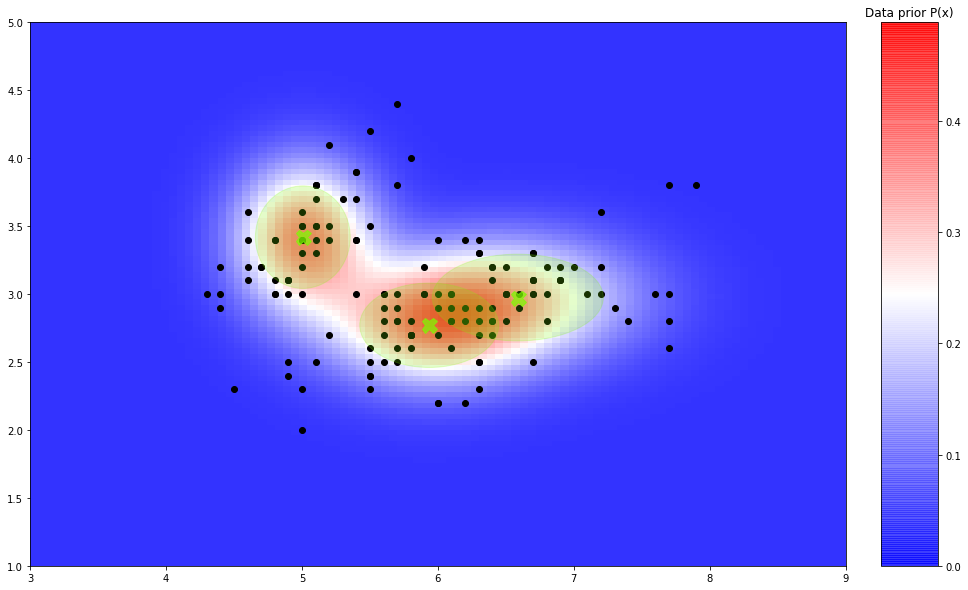

In [5]:
means = classifiers['Naive Bayes'].theta_
sigmas = classifiers['Naive Bayes'].sigma_
priors = classifiers['Naive Bayes'].class_prior_
from scipy.stats import multivariate_normal

n_classes = means.shape[0]
n_points = Xfull.shape[0]
Z = np.zeros((n_points,))
for k in range(n_classes):    
    Z += priors[k] * multivariate_normal.pdf(Xfull, mean=means[k], cov=np.diag(sigmas[k]))

a = plt.subplot(111, aspect='equal')
plt.scatter(X[:, 0], X[:, 1], marker='o', c='k')
plt.plot(means[:, 0], means[:, 1], 'X', color='lawngreen', ms=15, alpha=0.7)
ells = [mpl.patches.Ellipse(means[k], 2*np.sqrt(sigmas[k][0]), 2*np.sqrt(sigmas[k][1]), 0, color='lawngreen') for k in range(n_classes)]
for e in ells:
    e.set_clip_box(a.bbox)
    e.set_alpha(0.2)
    a.add_artist(e)
plt.imshow(Z.reshape((100, 100)), cmap=plt.cm.bwr, alpha=0.8,
                                   extent=(3, 9, 1, 5), origin='lower')
ax = plt.axes([0.82, 0.125, 0.04, 0.755])

plt.colorbar(cax=ax, orientation='vertical')
plt.title('Data prior P(x)');

# Gaussian Mixture Models!

In [5]:
# Parameters
n_samples = 1000

# Generate random sample following a sine curve
np.random.seed(0)
X = np.zeros((n_samples, 2))
step = 4. * np.pi / n_samples

for i in range(X.shape[0]):
    x = i * step - 6.
    X[i, 0] = x + np.random.normal(0, 0.1)
    X[i, 1] = 3. * (np.sin(x) + np.random.normal(0, .2))
    
color_iter = ['navy', 
              'c', 
              'cornflowerblue', 
              'gold', 
              'darkorange',
              'firebrick',
              'seagreen',
              'plum',
              'indigo',
              'coral'
             ]

def plot_results(X, Y, means, covariances, title):
    splot = plt.subplot(1, 1, 1)
    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        v, w = np.linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / np.linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y == i):
            continue
        plt.scatter(X[Y == i, 0], X[Y == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-6., 4. * np.pi - 6.)
    plt.ylim(-5., 5.)
    plt.title(title)
    plt.xticks(())
    plt.yticks(())


In [7]:
# Fit a Gaussian mixture with EM using ten components
pylab.rcParams['figure.figsize'] = (20, 10)

def mixtures(model, n_components, prior, covariance_type):
    if model == 'GMM':
        mm = mixture.GaussianMixture(n_components=n_components, covariance_type=covariance_type, 
                                     max_iter=100).fit(X)
        title = 'Expectation-maximization'
    elif model == 'DP_GMM':
        if covariance_type == 'diag' or covariance_type == 'spherical':
            cov_prior = 1e0
        else:
            cov_prior = 1e0 * np.eye(2)  
        mm = mixture.BayesianGaussianMixture(
            n_components=n_components, covariance_type=covariance_type, 
            weight_concentration_prior=np.power(10., prior),
            weight_concentration_prior_type='dirichlet_process', max_iter=100, random_state=2).fit(X)
        title = 'Bayesian Gaussian mixture models with a Dirichlet process prior'
    
    covariances = np.zeros((n_components, 2, 2))
    for i in range(n_components):
        if covariance_type == 'full':
            covariances[i] = mm.covariances_[i]
        elif covariance_type == 'tied':
            covariances[i] = mm.covariances_
        elif covariance_type == 'diag':
            covariances[i] = np.diag(mm.covariances_[i])
        elif covariance_type == 'spherical':
            covariances[i] = np.eye(mm.means_.shape[1]) * mm.covariances_[i]
                           
    plot_results(X, mm.predict(X), mm.means_, covariances, title)
        
interact(mixtures, 
         model=['GMM', 'DP_GMM'],
         n_components=ipywidgets.IntSlider(value=5, min=1, max=len(color_iter), step=1),
         prior=ipywidgets.FloatSlider(value=0, min=-3, max=3, step=0.1, description='gama 10^:'),
         covariance_type=['full', 'tied', 'diag', 'spherical']
        )

# 'full' (each component has its own general covariance matrix),
# 'tied' (all components share the same general covariance matrix),
# 'diag' (each component has its own diagonal covariance matrix),
# 'spherical' (each component has its own single variance).

interactive(children=(Dropdown(description='model', options=('GMM', 'DP_GMM'), value='GMM'), IntSlider(value=5, description='n_components', max=10, min=1), FloatSlider(value=0.0, description='gama 10^:', max=3.0, min=-3.0), Dropdown(description='covariance_type', options=('full', 'tied', 'diag', 'spherical'), value='full'), Output()), _dom_classes=('widget-interact',))

<function __main__.mixtures>